___

___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import scipy.stats as stats
%matplotlib inline

In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [28]:
Ad=pd.read_csv('advertising.csv')

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the survival of the passenger?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [4]:
Ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Using info and describe() on ad_data**

In [5]:
Ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
Ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [6]:
Ad.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [19]:
Ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'Male', 'Timestamp',
       'Clicked on Ad'],
      dtype='object')

# Removing useless columns from the data¶

In [29]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
Ad = Ad.drop(['Ad Topic Line','City','Country'],axis=1)
Ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


## Exploratory Data Analysis

Let's use seaborn to explore the data!


### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 
 **'Clicked on Ad'**, which is our target variable

We use bar charts to see how the data is distributed for these categorical columns.

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

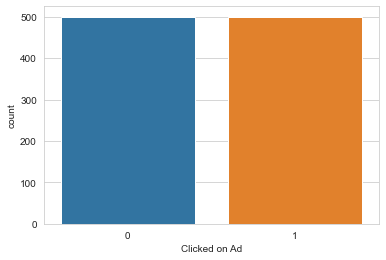

In [16]:
sns.countplot(x='Clicked on Ad',data=Ad)

### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, there are two continuous predictor variables 'Age',and 'Fare'

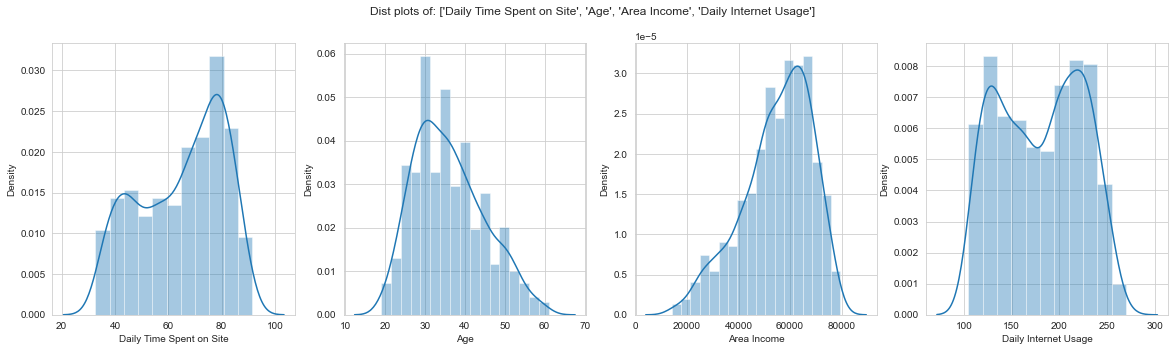

In [21]:
colsToPlot=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']
fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
fig.suptitle('Dist plots of: '+ str(colsToPlot))

for i, feature in zip(colsToPlot, range(len(colsToPlot))):
        sns.distplot(a=Ad[i],ax=subPlot[feature])


## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Age</b> : Selected. The distribution is normal.
* <b>Daily Time Spent on Site</b>: Selected.
* <b>Area Income</b>: Selected.The distribution is good.
* <b>Daily Internet Usage</b>: Selected.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

<AxesSubplot:>

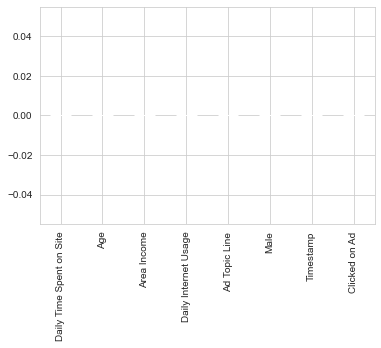

In [22]:
# Finding how many missing values are there for each column
Ad.isnull().sum().plot(kind='bar')

**No missing values in the data**

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.
## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

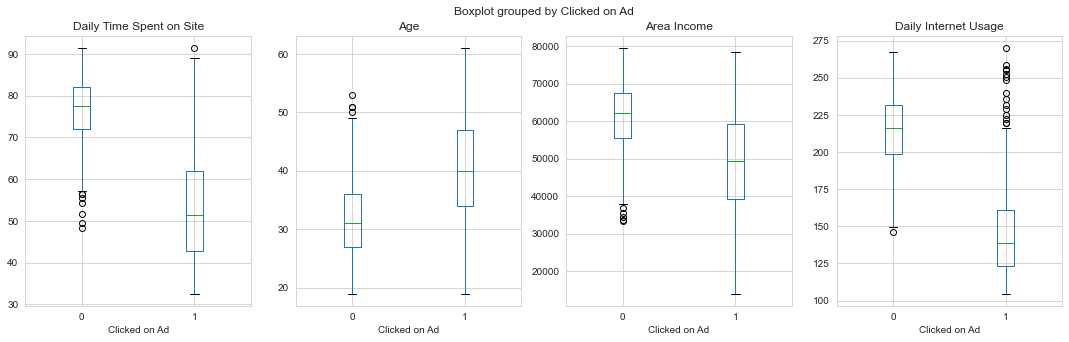

In [25]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    Ad.boxplot(column=PredictorCol, by='Clicked on Ad', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

It can be seen that none of the boxes are aligned with Clicked on Ad hence they might be correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
* ANOVA Test result: Probability of H0 being true

In [26]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [27]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage']
FunctionAnova(inpData=Ad, TargetVariable='Clicked on Ad', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Daily Time Spent on Site is correlated with Clicked on Ad | P-Value: 5.8773842441386545e-180
Age is correlated with Clicked on Ad | P-Value: 3.1298083092905155e-62
Area Income is correlated with Clicked on Ad | P-Value: 9.44958341282883e-58
Daily Internet Usage is correlated with Clicked on Ad | P-Value: 3.8932341225400295e-211


['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

The results of ANOVA confirm our visual analysis using box plots above.

<b>Final selected Continuous columns:</b>

**'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'**

# Relationship exploration: Continuous Vs Continuous -- Scatter Plots
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

**Here we will use seaborn's jointplot and pairplot to understand the relationship between continuous variables.**

**Jointplot showing Area Income versus Age.**

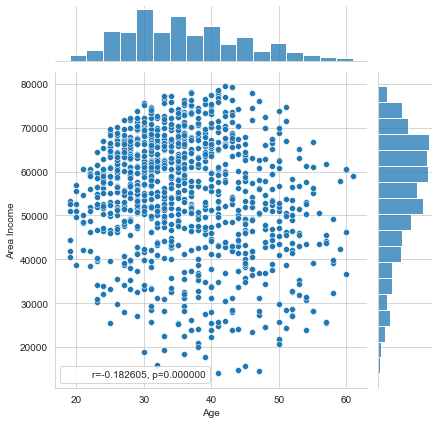

In [36]:
graph=sns.jointplot(x='Age',y='Area Income',data=Ad)
r, p = stats.pearsonr(Ad['Age'],Ad['Area Income'])
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

**Jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

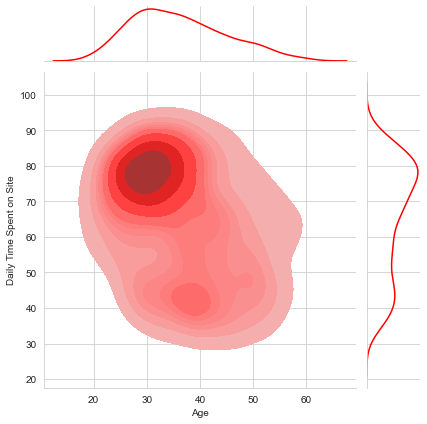

In [4]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=Ad,kind='kde',color='red',shade=True)

**Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

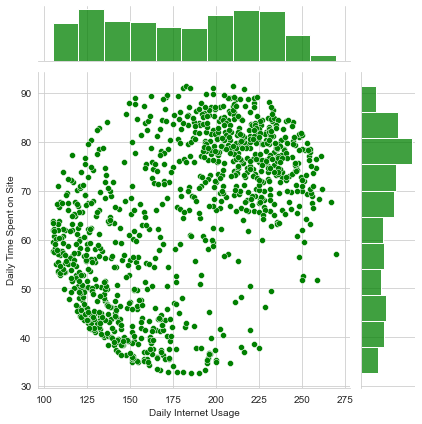

In [6]:
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=Ad,color='green')

**Pairplot with the hue defined by the 'Clicked on Ad' column feature.**

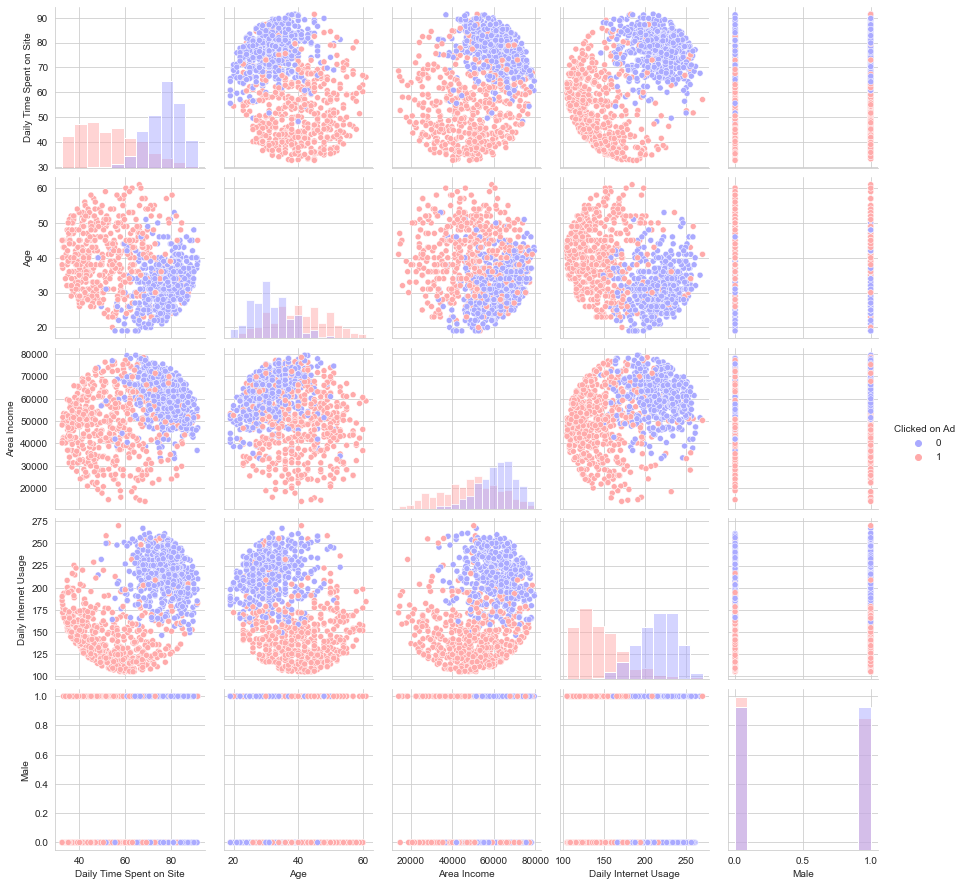

In [5]:
sns.pairplot(Ad,hue='Clicked on Ad',palette='bwr',diag_kind='hist')

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [31]:
SelectedColumns=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Clicked on Ad']

# Selecting final columns
DataForML=Ad[SelectedColumns]
DataForML.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0




## Now it's time to do a train test split, and train our model!

In [36]:
# Separate Target Variable and Predictor Variables
TargetVariable='Clicked on Ad'
Predictors =['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values


# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [34]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Recall (1)= How many correct 1s predicted / total 1s in original data, 
TP/ TP+ FN
precision (1) = How many correct 1s predicted / total 1s in prediction data, 
TP/TP+FP
F1 = 2 * Precision * Recall / Precision + Recall
It tells how good my model is to predict 0 -> 0 and 1 -> 1


# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
#ridge is forward, lasso is backward, both are hyperparameters,l1, l2 are ridge and lasso
#when do we use ridge and when we use lasso
#Answer: based on accuracy we can select ridge and lasso
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LogisticRegression(C=5, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       146
           1       0.98      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[143   9]
 [  3 145]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation:
 [1.         0.969997   0.969997   0.94987469 1.         0.979992
 0.969997   0.929993   0.96997298 0.93997599]

Final Average Accuracy of the model: 0.97


## Predictions and Evaluations


**Classification report for the model.**

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       146
           1       0.98      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Decision Tree

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       146
           1       0.95      0.91      0.93       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[139   7]
 [ 14 140]]
Accuracy of the model on Testing Sample Data: 0.93

Accuracy values for 10-fold Cross Validation:
 [1.         0.90991893 0.94995496 0.9599359  0.949995   0.93997599
 0.93997599 0.91996799 0.95998399 0.929993  ]

Final Average Accuracy of the model: 0.95


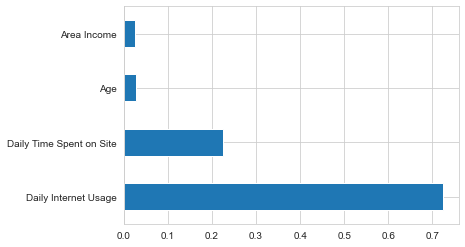

In [40]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
# entropy = 0 -> less randomness, entropy = 1 -> more randomness
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
#clf = tree.DecisionTreeClassifier(max_depth=3,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

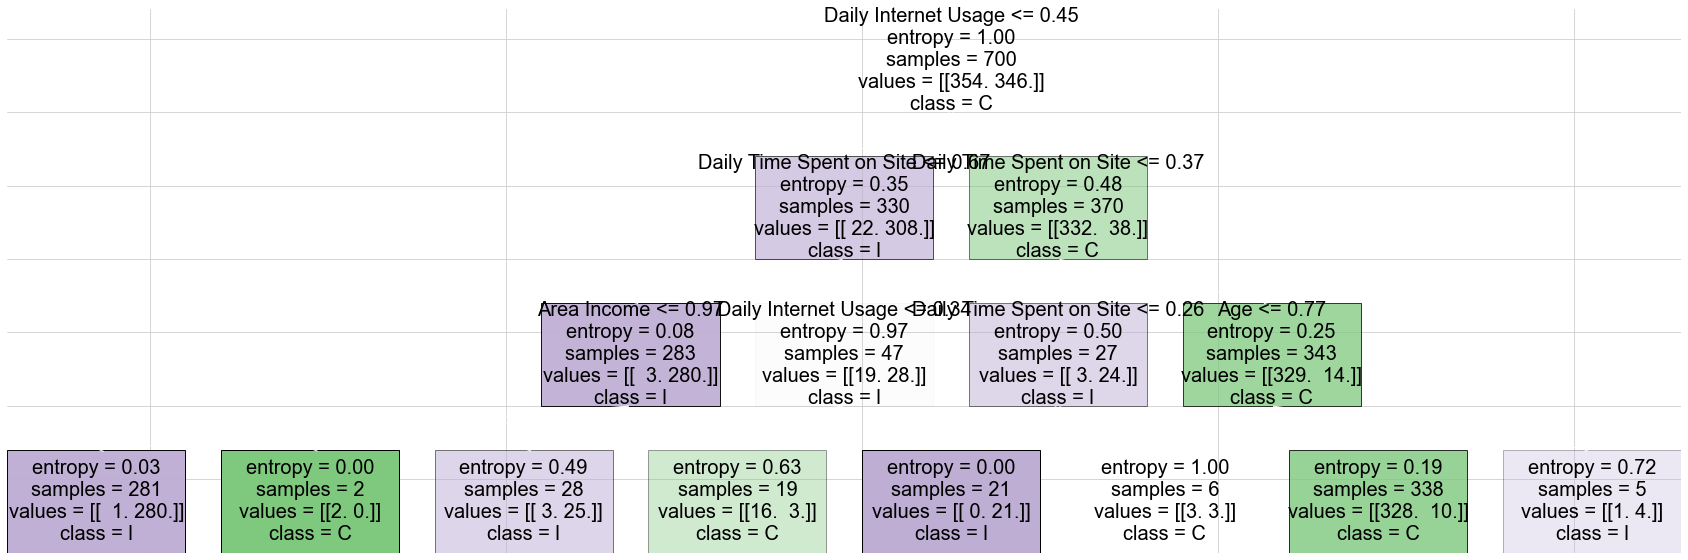

In [41]:
#Plotting the decision tree
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)